### Lucas Asset Pricing
- $z \sim N(0,\sigma)$ is shock process
- $y' = g(y,z) = \rho y+z$ is AR(1) endowment process
- $u(c) = c^{1-\gamma}/(1-\gamma)$ is utility function
- $f(y) = u'(y)p(y)$
- $f(y) = T(f)(y) = β E[f(y')+u(y')y']$ is Euler equation with $c=y$ (no trade in eqbm) and $s=1$ (full ownership)

In [22]:
import numpy as np
import plotly.io as pio
pio.renderers.default = "svg"
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [29]:
def model(β = 0.95, ρ = 0.9, γ = 2.0, σ = 0.1, Ngrid = 100, tol = 1e-10, show_f = False):

    def g(y,z):
        return np.exp(ρ*np.log(y)+z)

    def uprime(c):
        return c**(-γ)

    def p(y, F):
        return F / uprime(y)

    σy = σ/np.sqrt(1-ρ**2)
    Y = np.linspace(np.exp(-4*σy),np.exp(+4*σy),Ngrid)
    F_old = uprime(Y)
    F_new = uprime(Y)
    shocks = np.random.normal(0,σ,100)
    
    # VFI
    error = 1
    while error > tol:
        for y_i,y in enumerate(Y):
            yp = g(y,shocks) # generate many y'
            yp_i = np.abs(Y.reshape(-1,1) - yp).argmin(axis=0) # find idx of y'
            F_new[y_i] = β*np.mean(F_old[yp_i]+uprime(yp)*yp) # update with Expectation
        error = np.max(np.abs(F_new - F_old))
        F_old = np.copy(F_new)
        
    if show_f == True: 
        fig = px.line(x=Y, y=F_new, labels={'x':'y', 'y':'f(y)'}, title = 'Fixed Point Function')
        fig.show()   

    fig = px.line(y=p(Y, F_new),x=Y, labels={'x':'y', 'y':'P(y)'}, title = 'Asset Price')
    fig.show()
    
    return Y, F_new, p(Y, F_new)


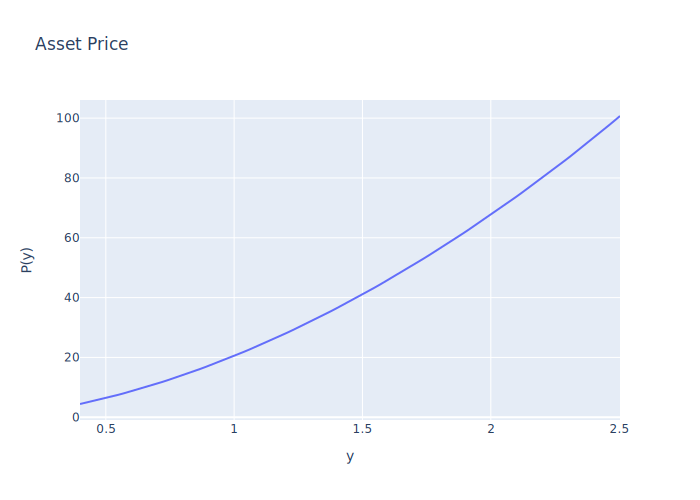

In [30]:
model();

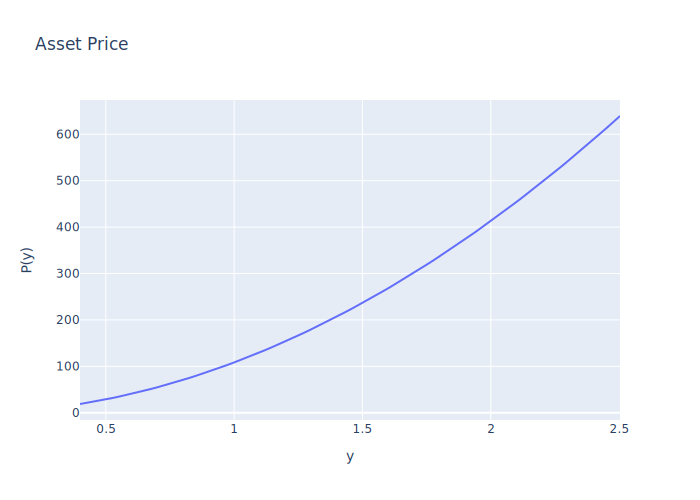

In [31]:
# Patient agents will value asset more as NPV of asset has risen. 
model(β = 0.99);

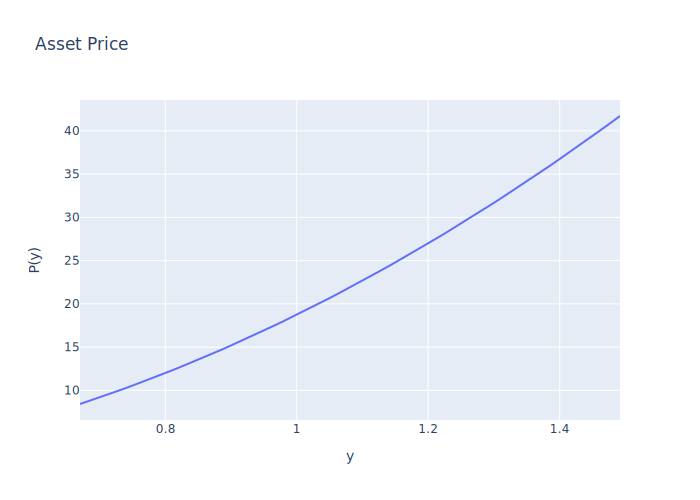

In [33]:
# Agents will value asset lesser if income shocks are not persistent 
model(ρ = 0);

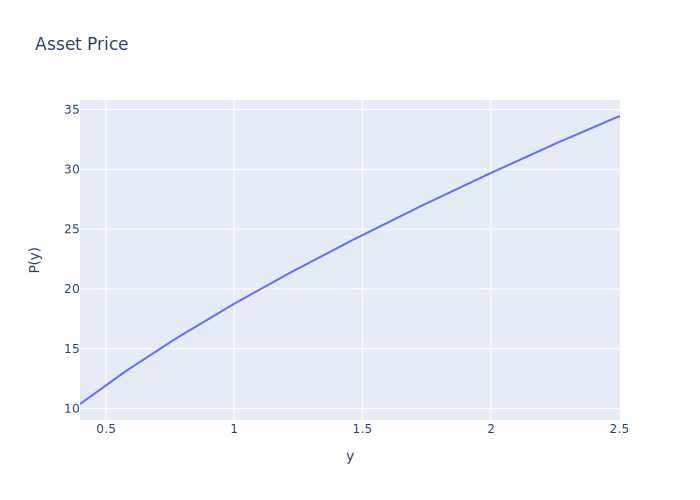

In [34]:
# Lower risk aversion implies 
model(γ = 0.5);